In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
dataset = datasets.fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

### KNNImputer
- train data의 n_neighbors와 가장 가까운 이웃의 평균값을 사용하여 대치(유클리디안 거리 사용)
    -> 원하는 인접 이웃 수의 가중 또는 가중 평균을 사용하여 결측값 대치

In [3]:
#KNNImputer import
from sklearn.impute import KNNImputer

In [4]:
#KNNImputer 예제
data = {'First':[80, 100, 20, np.nan, 65],
       'Second': [10, 20, 55, 60, np.nan],
       'Third': [80, np.nan, 70, 60, 88]}
Data = pd.DataFrame(data)
Data

,First,Second,Third
0,80.0,10.0,80.0
1,100.0,20.0,NaN
2,20.0,55.0,70.0
3,NaN,60.0,60.0
4,65.0,NaN,88.0


In [5]:
imputer = KNNImputer(n_neighbors=2)
Data_filled = imputer.fit_transform(Data)
pd.DataFrame(Data_filled)
#이웃에 있는 값들과 근사값으로 채워지는 것을 확인할 수 있음
#20과 65 사이의 결측치는 두 값의 평균으로 대치됨

,0,1,2
0,80.0,10.0,80.0
1,100.0,20.0,84.0
2,20.0,55.0,70.0
3,42.5,60.0,60.0
4,65.0,35.0,88.0


### 캘리포니아 데이터 결측값 생성

In [6]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


113

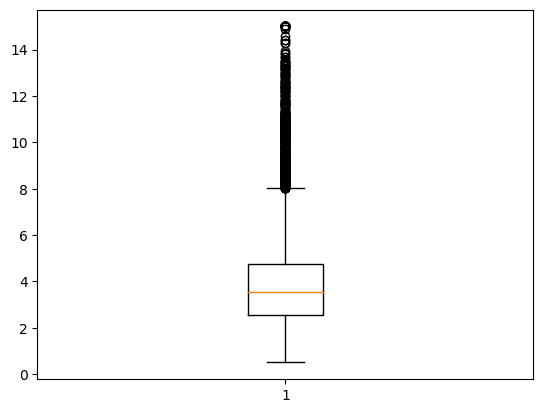

In [7]:
#약 100개의 결측값을 생성하기 위해 'MedInc'의 데이터 분포 확인
plt.boxplot(df['MedInc'])
len(df[df['MedInc'] > 12])

In [8]:
#MedInc이 12보다 큰 값은 결측값으로 대체
df.loc[df['MedInc']>=12, 'MedInc'] = np.nan

In [9]:
#결측값 생성 확인
df.isna().sum()

MedInc        113
HouseAge        0
AveRooms        0
AveBedrms       0
Population      0
AveOccup        0
Latitude        0
Longitude       0
target          0
dtype: int64

In [10]:
#결측값을 0과 평균으로 대치한 데이터 생성
df_zero = df.fillna(0)
df_mean = df.fillna(df['MedInc'].mean())

In [11]:
df_zero.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [12]:
df_mean.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [13]:
#KNNImputer를 사용하여 결측값 대치
imputer = KNNImputer(n_neighbors=4)
df_Knn = pd.DataFrame(imputer.fit_transform(df))

In [15]:
df_Knn.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

### 결측치 처리 방식별 RMSE값 확인

In [44]:
#0으로 결측치 처리한 경우

x_train, x_test, y_train, y_test = train_test_split(df_zero.drop('target', axis = 1), df_zero['target'], test_size = 0.3, random_state = 111)
rmse_val = []
for k in range(100):
    k = k+1
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error=sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print('RMSE ', k, '=', error)

RMSE  1 = 1.298860502717693
RMSE  2 = 1.1610371647810946
RMSE  3 = 1.123066710018776
RMSE  4 = 1.1048895199653628
RMSE  5 = 1.093512102472148
RMSE  6 = 1.0894339256136332
RMSE  7 = 1.0893482885476564
RMSE  8 = 1.0886274704877539
RMSE  9 = 1.0895196039657475
RMSE  10 = 1.0908000985577546
RMSE  11 = 1.0912555353985427
RMSE  12 = 1.0935471318149854
RMSE  13 = 1.0936417087330985
RMSE  14 = 1.0962298849489012
RMSE  15 = 1.0985648518612054
RMSE  16 = 1.0990362924861987
RMSE  17 = 1.1005928680194583
RMSE  18 = 1.102412873885641
RMSE  19 = 1.1028586102845883
RMSE  20 = 1.1025256910870624
RMSE  21 = 1.1037048376866012
RMSE  22 = 1.105757039660361
RMSE  23 = 1.1073449571848533
RMSE  24 = 1.1091079646915363
RMSE  25 = 1.110286718375651
RMSE  26 = 1.1108627737787842
RMSE  27 = 1.1109035942195467
RMSE  28 = 1.1124281555594808
RMSE  29 = 1.1141045349912888
RMSE  30 = 1.1154060974743207
RMSE  31 = 1.115577246052624
RMSE  32 = 1.1166380057588559
RMSE  33 = 1.1164516102869837
RMSE  34 = 1.1169187350654

<Axes: >

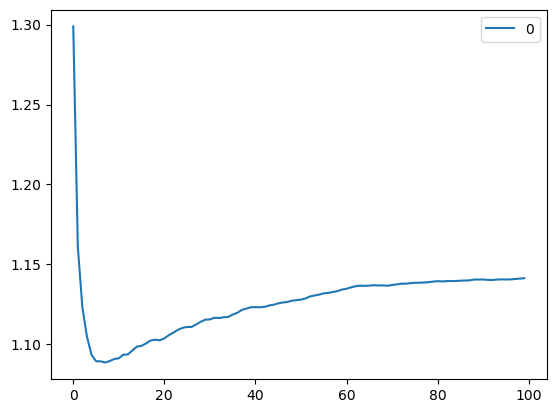

In [26]:
curve_0 = pd.DataFrame(rmse_val)
curve_0.plot()

In [29]:
#평균으로 결측치 처리한 경우

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(df_mean.drop('target', axis = 1), df_mean['target'], test_size = 0.3, random_state = 111)
rmse_val_1 = []
for k in range(100):
    k = k+1
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train_1, y_train_1)
    pred_1 = model.predict(x_test_1)
    error_1=sqrt(mean_squared_error(y_test_1, pred_1))
    rmse_val_1.append(error_1)
    print('RMSE ', k, '=', error_1)

RMSE  1 = 1.2938989576558646
RMSE  2 = 1.1560958159514692
RMSE  3 = 1.114297728954652
RMSE  4 = 1.0934806215702308
RMSE  5 = 1.0833493863770898
RMSE  6 = 1.0803205535935279
RMSE  7 = 1.0808269253610863
RMSE  8 = 1.08095664822069
RMSE  9 = 1.081639524724523
RMSE  10 = 1.0826360454858084
RMSE  11 = 1.0838195807613409
RMSE  12 = 1.0861393948804314
RMSE  13 = 1.0862598153766825
RMSE  14 = 1.0886512405185893
RMSE  15 = 1.0919145787688658
RMSE  16 = 1.0930256035701966
RMSE  17 = 1.0952333046979017
RMSE  18 = 1.0970143584581729
RMSE  19 = 1.097730452589235
RMSE  20 = 1.0978342083156836
RMSE  21 = 1.09893008762995
RMSE  22 = 1.1012037288974974
RMSE  23 = 1.1029416734318227
RMSE  24 = 1.1047832985695352
RMSE  25 = 1.1059767871404624
RMSE  26 = 1.1064300080861609
RMSE  27 = 1.106763236318584
RMSE  28 = 1.1082555755981707
RMSE  29 = 1.1100290717082724
RMSE  30 = 1.1116960932411746
RMSE  31 = 1.112093153640884
RMSE  32 = 1.1132153500049282
RMSE  33 = 1.1132041420058758
RMSE  34 = 1.113675729055676

<Axes: >

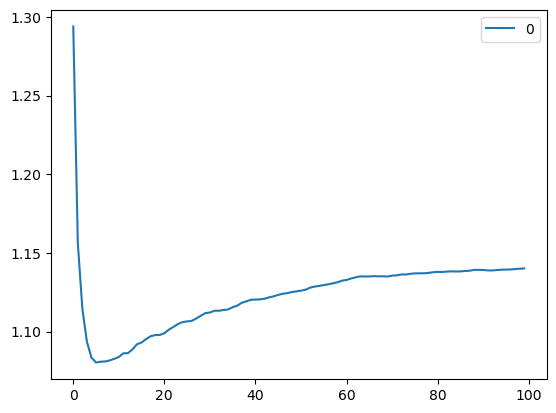

In [30]:
curve_1 = pd.DataFrame(rmse_val_1)
curve_1.plot()

In [39]:
#KNNImputer으로 결측치 처리한 경우

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(df_Knn.drop(8, axis = 1), df_Knn[8], test_size = 0.3, random_state = 111)
rmse_val_2 = []
for k in range(100):
    k = k+1
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train_2, y_train_2)
    pred_2 = model.predict(x_test_2)
    error_2=sqrt(mean_squared_error(y_test_2, pred_2))
    rmse_val_2.append(error_2)
    print('RMSE ', k, '=', error_2)

RMSE  1 = 1.2875722027696757
RMSE  2 = 1.146809341792897
RMSE  3 = 1.1090882411745686
RMSE  4 = 1.0892278227519374
RMSE  5 = 1.0785300851618478
RMSE  6 = 1.0760205608296893
RMSE  7 = 1.076693901634216
RMSE  8 = 1.0774138091498475
RMSE  9 = 1.0781054100331326
RMSE  10 = 1.0793894314572385
RMSE  11 = 1.081157159473684
RMSE  12 = 1.0839264408662659
RMSE  13 = 1.084222958821545
RMSE  14 = 1.0866122680701993
RMSE  15 = 1.0894661578780196
RMSE  16 = 1.0911784460851324
RMSE  17 = 1.093242534880219
RMSE  18 = 1.0951581821312113
RMSE  19 = 1.095858796568564
RMSE  20 = 1.0956864497261065
RMSE  21 = 1.0971529812501946
RMSE  22 = 1.0996449196242177
RMSE  23 = 1.1011351396814746
RMSE  24 = 1.103070017201367
RMSE  25 = 1.1042039266867294
RMSE  26 = 1.1047921893206292
RMSE  27 = 1.1052367344877896
RMSE  28 = 1.1068923001797677
RMSE  29 = 1.1086490763641326
RMSE  30 = 1.1100902283840934
RMSE  31 = 1.1107597667115923
RMSE  32 = 1.1118998611624038
RMSE  33 = 1.1119159699490968
RMSE  34 = 1.1124159225401

<Axes: >

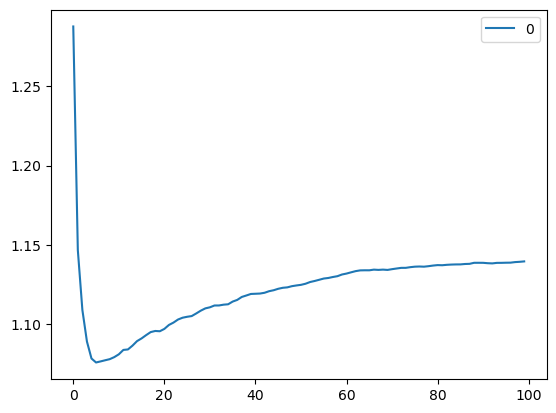

In [43]:
curve_2 = pd.DataFrame(rmse_val_2)
curve_2.plot()

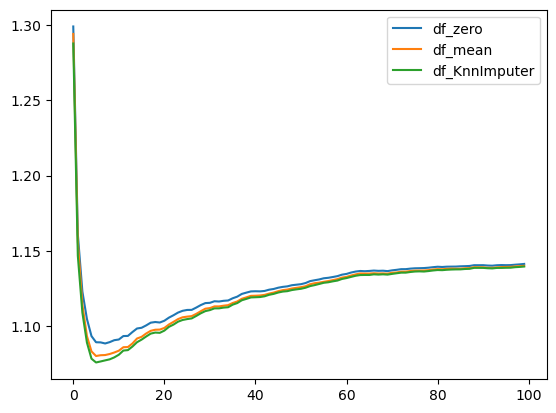

In [54]:
plt.plot(curve_0, label='df_zero')
plt.plot(curve_1, label='df_mean')
plt.plot(curve_2, label='df_KnnImputer')

plt.legend()
plt.show()

- 3개의 RMSE값 추이를 비교한 결과 일정 이상의 k값 이후에는 비슷하게 rmse가 수렴하는 것을 확인할 수 있음
- RMSE의 최소값이 KnnImputer < mean < zero 순인 것을 확인할 수 있음
- 결과적으로 해당 데이터셋에서는 KnnImputer가 가장 효과적인 RMSE 감소 추이를 보임